# Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('job_sample.csv')
ds.head(3)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0


In [3]:
ds.shape

(22000, 14)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


# Checking Missing Values

In [5]:
(ds.isnull().sum()/ds.shape[0])*100

country             0.000000
country_code        0.000000
date_added         99.445455
has_expired         0.000000
job_board           0.000000
job_description     0.000000
job_title           0.000000
job_type            7.400000
location            0.000000
organization       31.213636
page_url            0.000000
salary             84.336364
sector             23.609091
uniq_id             0.000000
dtype: float64

<Axes: >

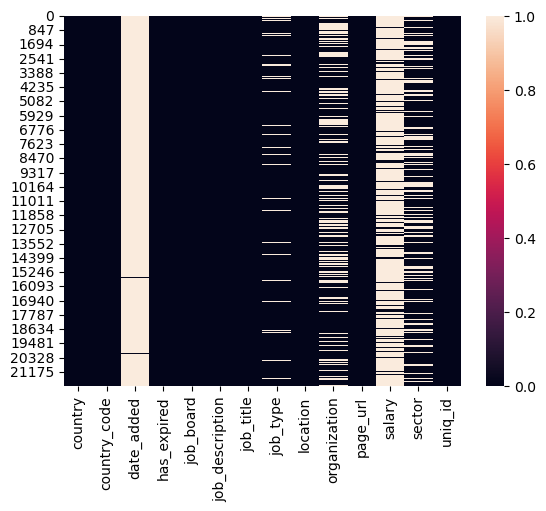

In [6]:
sns.heatmap(ds.isnull())

# Handling Messy Data

In [7]:
ds['job_type'].unique()

array(['Full Time Employee', 'Full Time', 'Full Time, Employee',
       'Part Time Employee', nan, 'Full Time Temporary/Contract/Project',
       'Full Time , Employee', 'Full Time, Temporary/Contract/Project',
       'Employee', 'Part Time', 'Part Time, Employee', 'Full Time Intern',
       'Temporary/Contract/Project', 'Full Time / Employee',
       'Full Time , Temporary/Contract/Project',
       'Part Time, Temporary/Contract/Project', 'Full Time/ Employee',
       'Per Diem, Employee', 'Job Type Full Time Employee', 'Per Diem',
       'Full Time\xa0', 'Part Time Intern', 'Per Diem Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project', 'Exempt',
       'Part Time , Temporary/Contract/Project', 'Full Time\xa0 Employee',
       'Part Time Seasonal', 'Part Time , Employee', 'Job Type Employee',
       'Job Type Full Time Temporary/Contract/Project',
       'Full Time / > Employee', 'Part Time\xa0',
       'Per Diem, Temporary/Contract

In [8]:
ds['job_type']=ds['job_type'].str.replace('Full Time Employee','Full Time')
ds['job_type']=ds['job_type'].str.replace('Full Time, Employee','Full Time')
ds['job_type']=ds['job_type'].str.replace('Full Time , Employee','Full Time')
ds['job_type']=ds['job_type'].str.replace('Full Time / > Employee','Full Time')
ds['job_type']=ds['job_type'].str.replace('Job Type Full Time','Full Time')
ds['job_type']=ds['job_type'].str.replace('Full Time\xa0','Full Time')
ds['job_type']=ds['job_type'].str.replace('Employee','Full Time')
ds['job_type']=ds['job_type'].str.replace('Part Time , Full Time','Full Time')

In [9]:
ds['job_type']=ds['job_type'].str.replace('Part Time / Employee','Part Time')
ds['job_type']=ds['job_type'].str.replace('Part Time , Employee','Part Time')
ds['job_type']=ds['job_type'].str.replace('Job Type Part Time','Part Time')
ds['job_type']=ds['job_type'].str.replace('Part Time\xa0','Part Time')
ds['job_type']=ds['job_type'].str.replace('Part Time, Full Time','Part Time')

In [10]:
ds['job_type']=ds['job_type'].str.replace('Full Time Temporary/Contract/Project','Contract')
ds['job_type']=ds['job_type'].str.replace('Full Time, Temporary/Contract/Project','Contract')
ds['job_type']=ds['job_type'].str.replace('Temporary/Contract/Project','Contract')
ds['job_type']=ds['job_type'].str.replace('Full Time / Contract','Contract')
ds['job_type']=ds['job_type'].str.replace('Part Time Contract','Contract')
ds['job_type']=ds['job_type'].str.replace('Full Time , Contract','Contract')
ds['job_type']=ds['job_type'].str.replace('Part Time, Contract','Contract')
ds['job_type']=ds['job_type'].str.replace('Per Diem, Contract','Contract')
ds['job_type']=ds['job_type'].str.replace('Part Time Full Time','Part Time')
ds['job_type']=ds['job_type'].str.replace('Full Time / Full Time','Part Time')
ds['job_type']=ds['job_type'].str.replace('Full Time/ Full Time','Part Time')
ds['job_type']=ds['job_type'].str.replace('Per Diem, Full Time','Full Time')
ds['job_type']=ds['job_type'].str.replace('Per Diem Full Time','Full Time')
ds['job_type']=ds['job_type'].str.replace('Part Time/ Contract','Contract')
ds['job_type']=ds['job_type'].str.replace('Part Time , Contract','Contract')
ds['job_type']=ds['job_type'].str.replace('Full Time Full Time','Full Time')
ds['job_type']=ds['job_type'].str.replace('Part Time / Full Time','Full Time')
ds['job_type']=ds['job_type'].str.replace('Job Type Full Time','Full Time')
ds['job_type']=ds['job_type'].str.replace('Part Time Seasonal','Part Time')

ds['job_type']=ds['job_type'].str.replace('Full Time Intern','Intern')
ds['job_type']=ds['job_type'].str.replace('Part Time Intern','Intern')
ds['job_type']=ds['job_type'].str.replace('Part Time, Intern','Intern')

ds['job_type']=ds['job_type'].str.replace('Per Day, Full Time','Per Day')

In [11]:
ds['job_type'].unique()

array(['Full Time', 'Part Time', nan, 'Contract', 'Intern', 'Per Diem',
       'Exempt'], dtype=object)

In [12]:
ds.drop(columns=['country','date_added'], inplace=True)

In [13]:
ds=ds.drop(columns=['job_description','page_url'])
ds.head(3)

,country_code,has_expired,job_board,job_title,job_type,location,organization,salary,sector,uniq_id
0,US,No,jobs.monster.com,IT Support Technician Job in Madison,Full Time,"Madison, WI 53702",NaN,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,US,No,jobs.monster.com,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,US,No,jobs.monster.com,Johnson & Johnson Family of Companies Job Appl...,Full Time,DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0


In [14]:
ds['new_location'] = ds['location'].apply(lambda x: ' '.join(x.split()[:3]))
ds['new_job_title'] = ds['job_title'].apply(lambda x: ' '.join(x.split()[:3]))
ds.head(3)

,country_code,has_expired,job_board,job_title,job_type,location,organization,salary,sector,uniq_id,new_location,new_job_title
0,US,No,jobs.monster.com,IT Support Technician Job in Madison,Full Time,"Madison, WI 53702",NaN,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"Madison, WI 53702",IT Support Technician
1,US,No,jobs.monster.com,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,"Madison, WI 53708",Business Reporter/Editor Job
2,US,No,jobs.monster.com,Johnson & Johnson Family of Companies Job Appl...,Full Time,DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,DePuy Synthes Companies,Johnson & Johnson


In [15]:
ds=ds.drop(columns=['job_title','location'])

In [16]:
ds.head(3)

,country_code,has_expired,job_board,job_type,organization,salary,sector,uniq_id,new_location,new_job_title
0,US,No,jobs.monster.com,Full Time,NaN,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"Madison, WI 53702",IT Support Technician
1,US,No,jobs.monster.com,Full Time,Printing and Publishing,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,"Madison, WI 53708",Business Reporter/Editor Job
2,US,No,jobs.monster.com,Full Time,Personal and Household Services,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,DePuy Synthes Companies,Johnson & Johnson


In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country_code   22000 non-null  object
 1   has_expired    22000 non-null  object
 2   job_board      22000 non-null  object
 3   job_type       20372 non-null  object
 4   organization   15133 non-null  object
 5   salary         3446 non-null   object
 6   sector         16806 non-null  object
 7   uniq_id        22000 non-null  object
 8   new_location   22000 non-null  object
 9   new_job_title  22000 non-null  object
dtypes: object(10)
memory usage: 1.7+ MB


# Filling the Missing Values

Filling in missing values in columns

In [25]:
ds['job_type'].mode()[0]

'Full Time'

In [29]:
ds['job_type'].fillna(ds['job_type'].mode()[0],inplace=True)

In [31]:
ds['organization'].mode()[0]

'Healthcare Services'

In [32]:
ds['organization'].fillna(ds['organization'].mode()[0],inplace=True)

In [37]:
ds['salary'].mode()[0]

'40,000.00 - 100,000.00 $ /year'

In [38]:
ds['salary'].fillna(ds['salary'].mode()[0],inplace=True)

In [40]:
ds['sector'].mode()[0]

'Experienced (Non-Manager)'

In [41]:
ds['sector'].fillna(ds['sector'].mode()[0],inplace=True)

In [42]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country_code   22000 non-null  object
 1   has_expired    22000 non-null  object
 2   job_board      22000 non-null  object
 3   job_type       22000 non-null  object
 4   organization   22000 non-null  object
 5   salary         22000 non-null  object
 6   sector         22000 non-null  object
 7   uniq_id        22000 non-null  object
 8   new_location   22000 non-null  object
 9   new_job_title  22000 non-null  object
dtypes: object(10)
memory usage: 1.7+ MB


<Axes: >

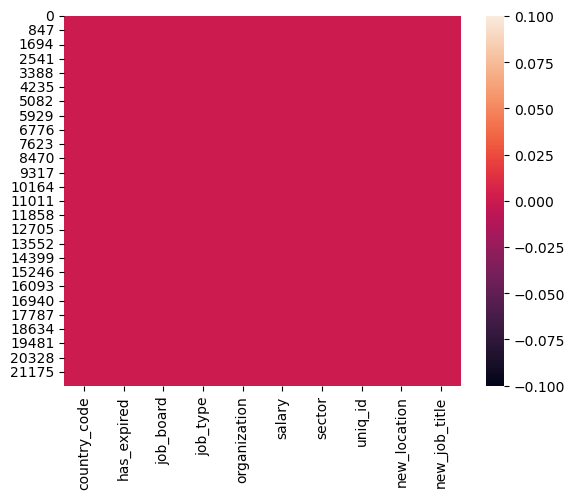

In [43]:
sns.heatmap(ds.isnull())

# ENCODING FOR ML

Used Label Encoding

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [45]:
ds['job_type'].unique()

array(['Full Time', 'Part Time', 'Contract', 'Intern', 'Per Diem',
       'Exempt'], dtype=object)

In [47]:
ds['job_Label_Encoding'] = le.fit_transform(ds['job_type'])
ds['sal_Label_Encoding'] = le.fit_transform(ds['salary'])
ds['jobtitle_Label_Encoding'] = le.fit_transform(ds['new_job_title'])
ds['sec_Label_Encoding'] = le.fit_transform(ds['sector'])
ds['loc_Label_Encoding'] = le.fit_transform(ds['new_location'])
ds['org_Label_Encoding'] = le.fit_transform(ds['organization'])
ds.head(3)

,country_code,has_expired,job_board,job_type,organization,salary,sector,uniq_id,new_location,new_job_title,job_Label_Encoding,sal_Label_Encoding,jobtitle_Label_Encoding,sec_Label_Encoding,loc_Label_Encoding,org_Label_Encoding
0,US,No,jobs.monster.com,Full Time,Healthcare Services,"40,000.00 - 100,000.00 $ /year",IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"Madison, WI 53702",IT Support Technician,2,898,4716,102,3981,345
1,US,No,jobs.monster.com,Full Time,Printing and Publishing,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),e4cbb126dabf22159aff90223243ff2a,"Madison, WI 53708",Business Reporter/Editor Job,2,898,1281,56,3986,538
2,US,No,jobs.monster.com,Full Time,Personal and Household Services,"40,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),839106b353877fa3d896ffb9c1fe01c0,DePuy Synthes Companies,Johnson & Johnson,2,898,5065,56,2102,531


# Outlier Detection

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ds.describe()

,job_Label_Encoding,sal_Label_Encoding,jobtitle_Label_Encoding,sec_Label_Encoding,loc_Label_Encoding,org_Label_Encoding
count,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000
mean,1.926318,896.498182,5722.462182,75.668273,3313.820864,352.305773
std,0.737444,191.619611,3225.784895,36.926824,1950.942376,158.378049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,898.000000,2859.750000,56.000000,1602.000000,303.000000
50%,2.000000,898.000000,5925.000000,56.000000,3136.000000,345.000000
75%,2.000000,898.000000,8542.250000,111.000000,4929.250000,440.000000
max,5.000000,1736.000000,11331.000000,162.000000,7124.000000,737.000000


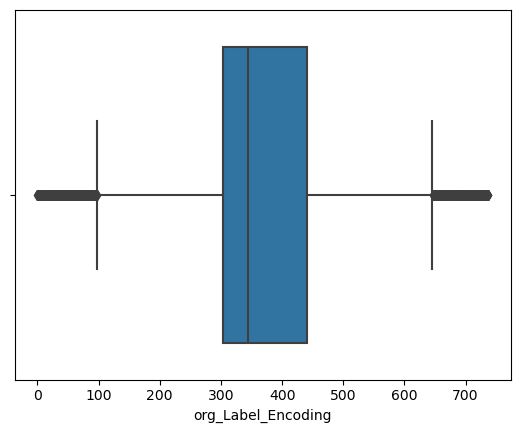

In [56]:
sns.boxplot(x="org_Label_Encoding",data=ds)
plt.show()

# Removing Outlier

In [57]:
q1 = ds['org_Label_Encoding'].quantile(0.25)
q1
q3 = ds['org_Label_Encoding'].quantile(0.75)
q3
iqr = q3 -q1

min_range = q1 - (iqr*0.25)
max_range = q3 + (iqr*0.75)
min_range, max_range

new_dataset = ds[ds["org_Label_Encoding"]<=max_range]
new_dataset.shape

(18932, 16)

# Data Visualization

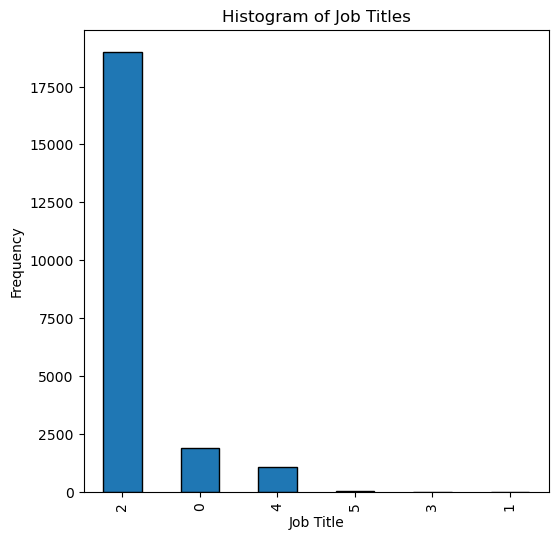

In [67]:
# histogram each job title
job_Label_Encoding_counts = ds['job_Label_Encoding'].value_counts()

plt.figure(figsize=(6, 6))
job_Label_Encoding_counts.plot(kind='bar', edgecolor='black')
plt.title('Histogram of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()